In [8]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
data=pd.read_csv('hmelq.csv')
df = data.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


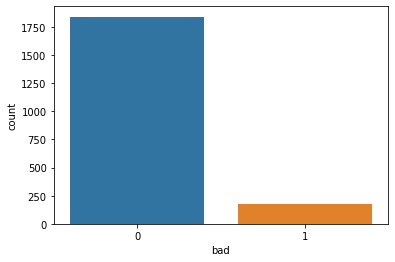

In [3]:
sns.countplot(df.bad);

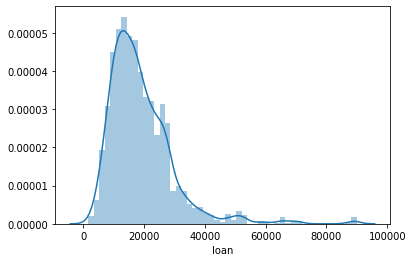

In [3]:
sns.distplot(df.loan);

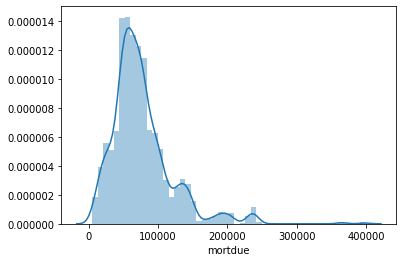

In [4]:
sns.distplot(df.mortdue);

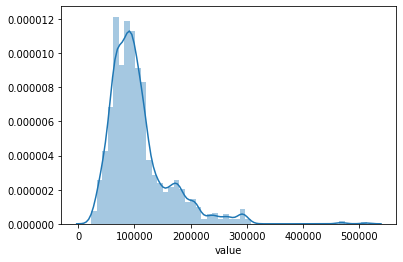

In [5]:
sns.distplot(df.value);

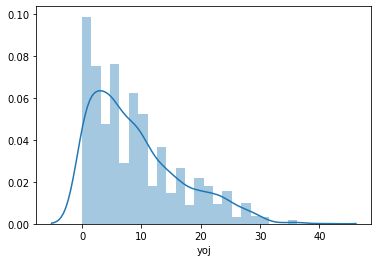

In [6]:
sns.distplot(df.yoj);

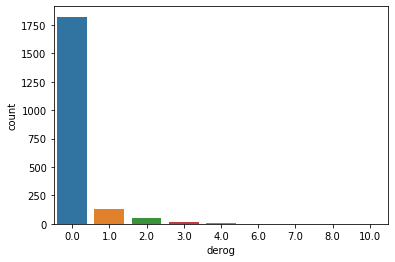

In [14]:
sns.countplot(df.derog);

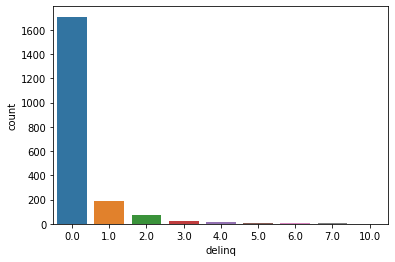

In [15]:
sns.countplot(df.delinq);

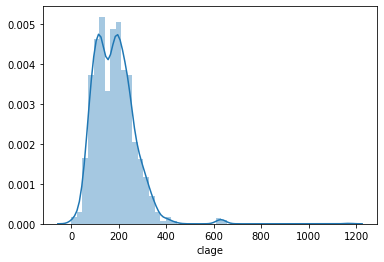

In [11]:
sns.distplot(df.clage);

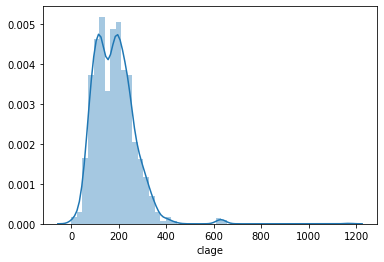

In [6]:
sns.distplot(df.clage);

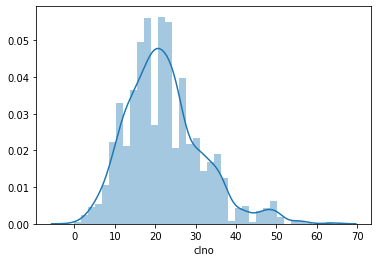

In [8]:
sns.distplot(df.clno);

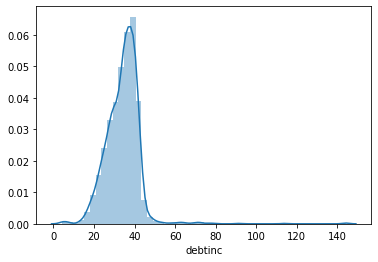

In [7]:
sns.distplot(df.debtinc);

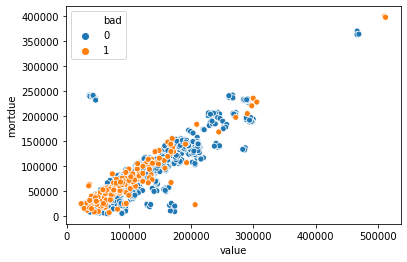

In [17]:
sns.scatterplot(x = "value", y = "mortdue", hue = "bad",data = df);

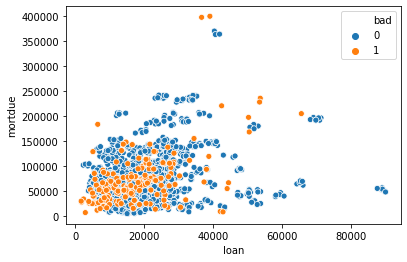

In [18]:
sns.scatterplot(x = "loan", y = "mortdue", hue = "bad",data = df);

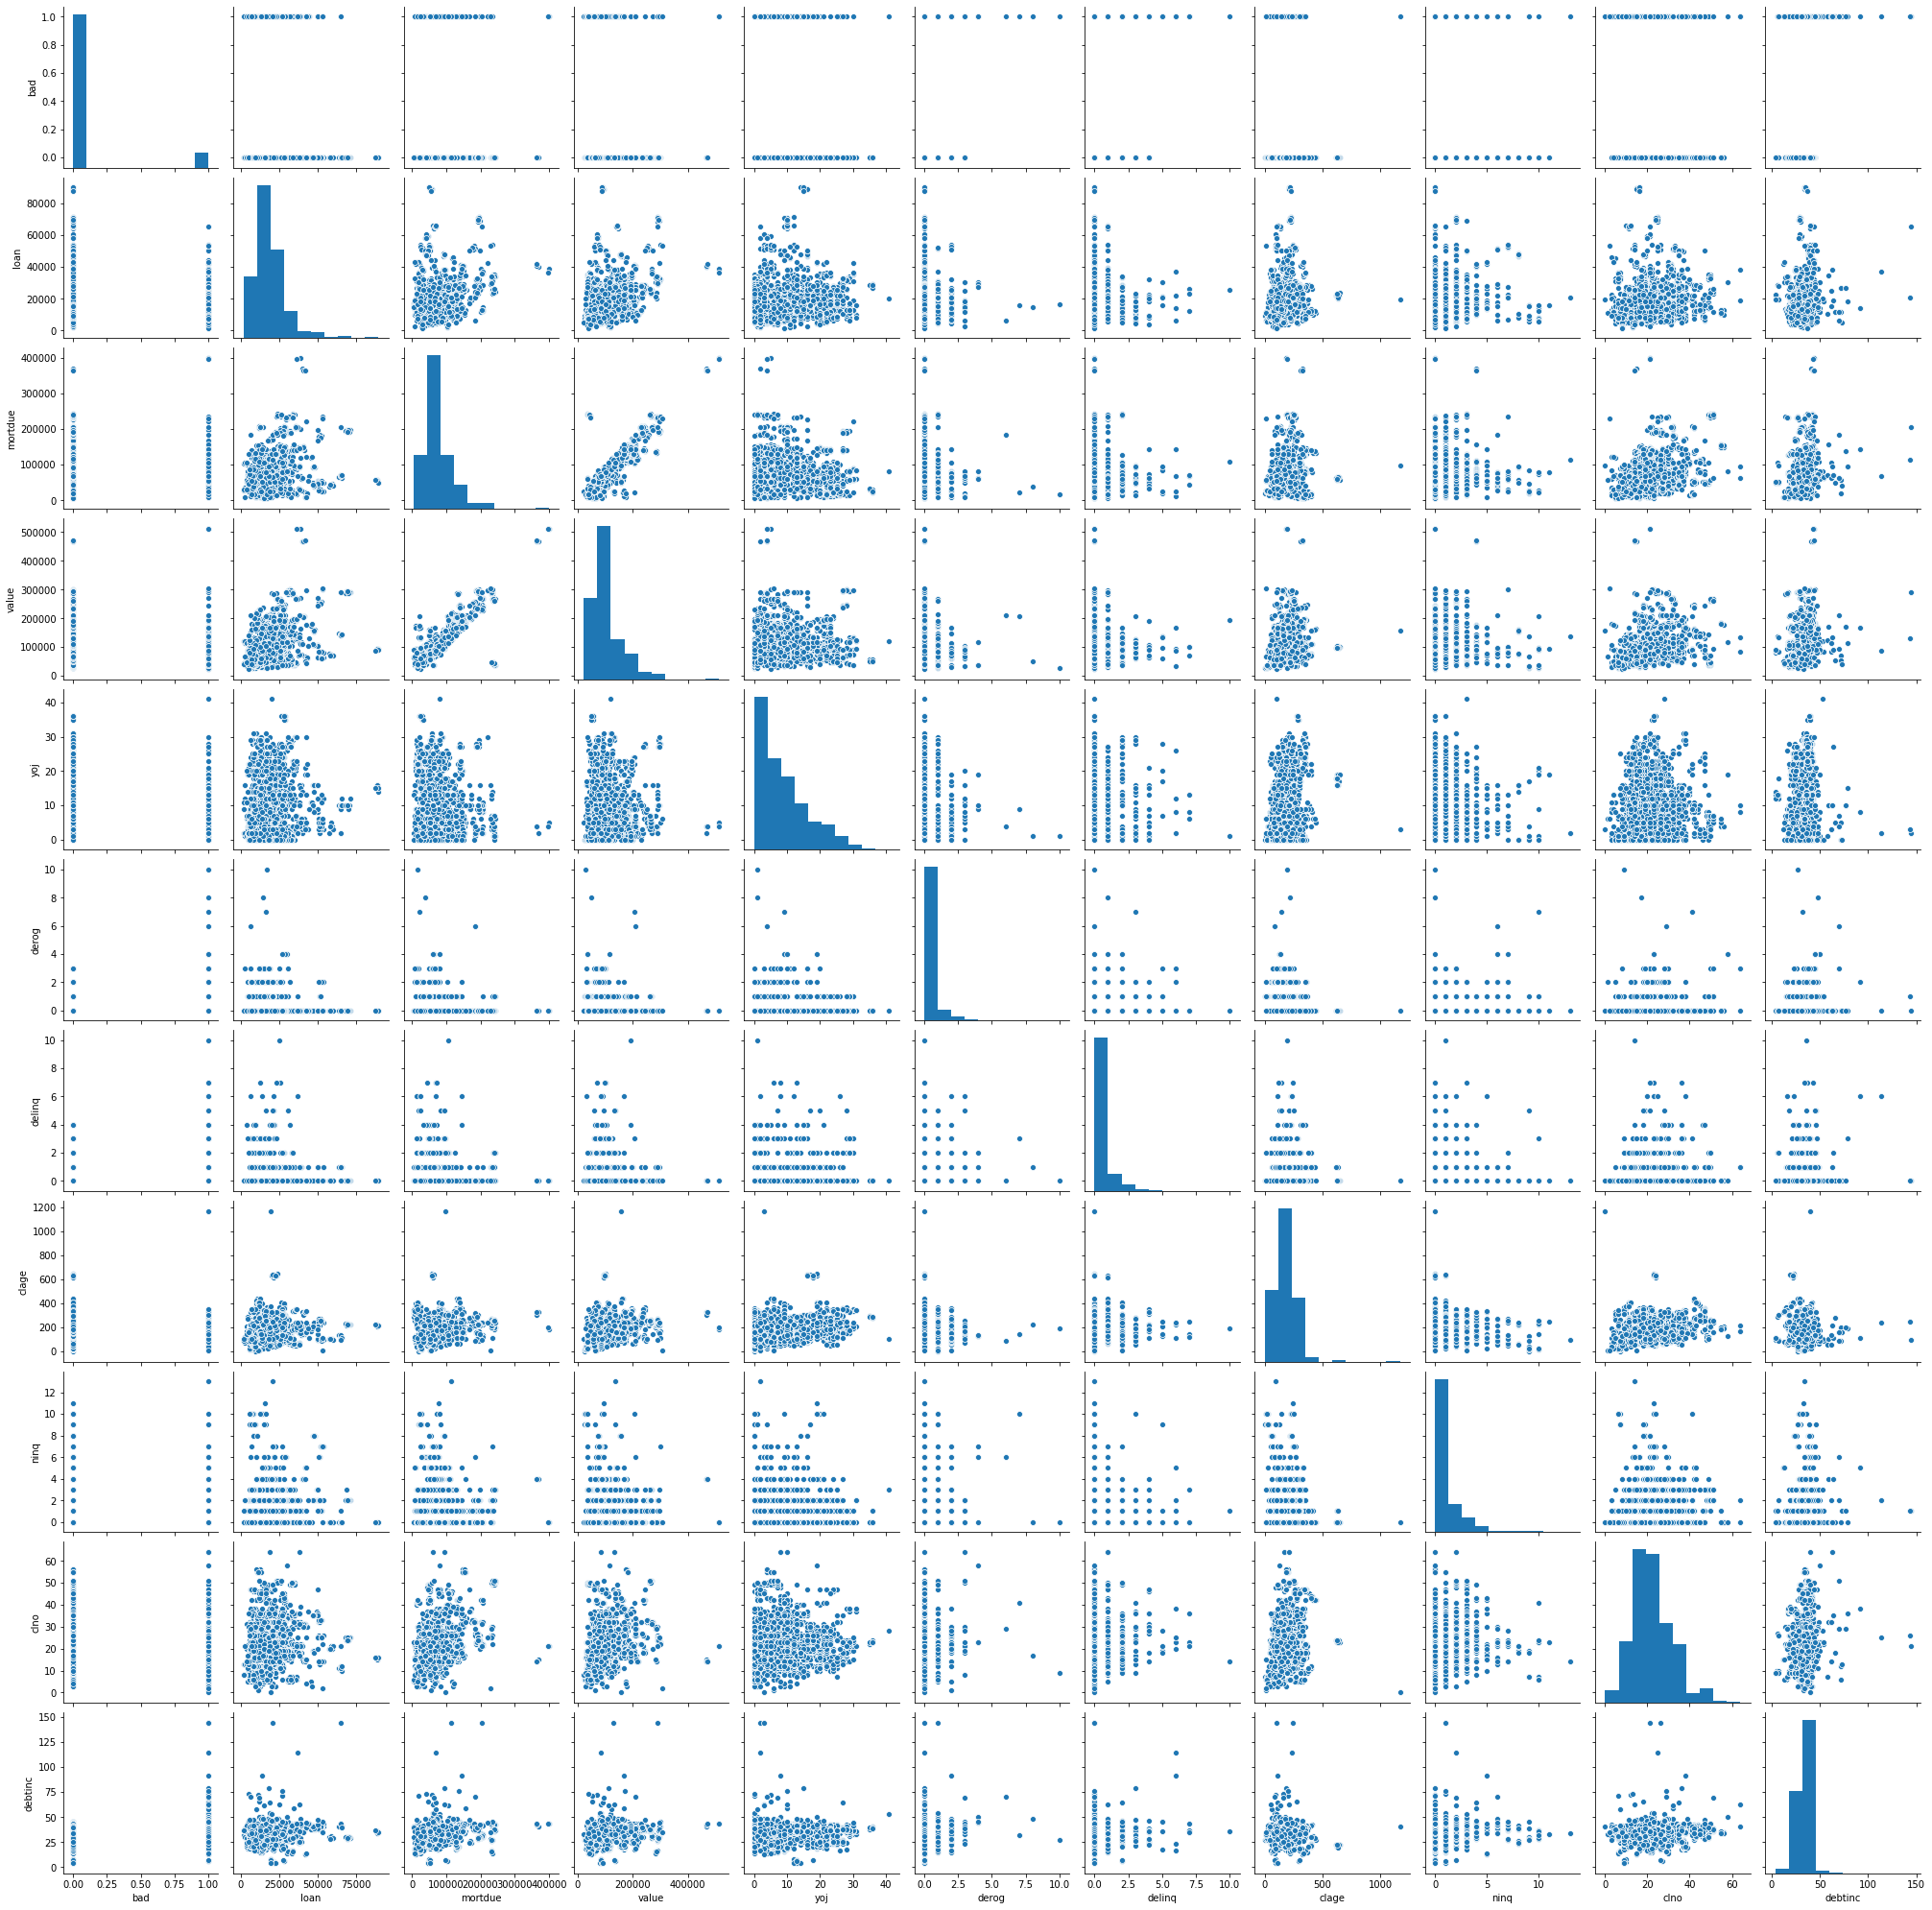

In [16]:
sns.pairplot(df);

In [10]:
dms=pd.get_dummies(df[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


# Logistic Regression

In [11]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


In [12]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:

loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.238483
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:                  0.2007
Time:                        18:02:47   Log-Likelihood:                -481.26
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 6.349e-43
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.625e-05   1.07e-05     -2.453      0.014   -4.72e-05   -5.27e-06
mortdue        -4.837e-06   4.98e-06     -0.972      0.331   -1.46e-05    4.91e-06
value           1.216e-07   4.35e-06      0.028      0.978   -8.41e-06    8.66e-06
yoj               -0.0145      0.013     -1.114      0.265      -0.040       0.011
derog              0.5742      0.131      4.388      0.000       0.318       0.831
delinq             0.7806      0.091      8.595      0.000       0.603       0.959
clage             -0.0066      0.001     -4.898      0.000      -0.009      -0.004
ninq               0.0919      0.048      1.916      0.055      -0.002       0.186
clno              -0.0369      0.011     -3.488      0.000      -0.058      -0.016
debtinc            0.0704      0.010      6.833      0.000       0.050       0.091
job_Mgr           -2.4682      0.364     -6.774      0.000      -3.182      -1.754
job_Office        -3.0527      0.381     -8.013      0.000      -3.799      -2.306
job_Other         -2.6848      0.317     -8.457      0.000      -3.307      -2.063
job_ProfEx        -2.5181      0.336     -7.494      0.000      -3.177      -1.860
job_Sales         -1.3558      0.620     -2.187      0.029      -2.571      -0.141
reason_DebtCon    -0.0854      0.193     -0.443      0.658      -0.463       0.292
==================================================================================
"""

In [14]:
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)

In [15]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.240438
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2007
Method:                           MLE   Df Model:                           10
Date:                Thu, 13 Aug 2020   Pseudo R-squ.:                  0.1942
Time:                        18:02:49   Log-Likelihood:                -485.20
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.369e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.055e-05    9.4e-06     -3.249      0.001    -4.9e-05   -1.21e-05
derog          0.6197      0.129      4.805      0.000       0.367       0.873
delinq         0.7805      0.089      8.788      0.000       0.606       0.955
clage         -0.0075      0.001     -5.801      0.000      -0.010      -0.005
clno          -0.0413      0.010     -4.087      0.000      -0.061      -0.021
debtinc        0.0673      0.010      6.936      0.000       0.048       0.086
job_Mgr       -2.4512      0.346     -7.094      0.000      -3.128      -1.774
job_Office    -3.0267      0.361     -8.378      0.000      -3.735      -2.319
job_Other     -2.6384      0.293     -8.998      0.000      -3.213      -2.064
job_ProfEx    -2.5794      0.321     -8.024      0.000      -3.209      -1.949
job_Sales     -1.3035      0.603     -2.160      0.031      -2.486      -0.121
==============================================================================
"""

In [16]:
#scikit-learn ile Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(C=0.1,solver = "newton-cg") 
loj_model = loj.fit(X_train,y_train)
loj_model


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred_train = loj_model.predict(X_train)


In [19]:
accuracy_score(y_train, y_pred_train)

0.9244114002478315

In [20]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1471
           1       0.84      0.18      0.30       143

    accuracy                           0.92      1614
   macro avg       0.88      0.59      0.63      1614
weighted avg       0.92      0.92      0.90      1614



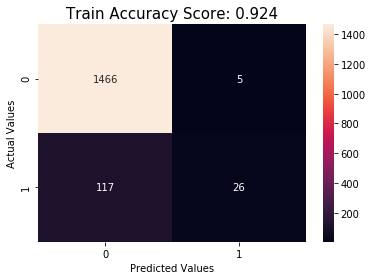

In [21]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_train)
score = round(accuracy_score(y_train, predictions), 3)
cm1 = cm(y_train, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Train Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [22]:
loj_model.intercept_


array([-3.35188221])

In [23]:
loj_model.coef_


array([[-2.01081390e-05, -6.75022444e-07,  2.19855561e-06,
        -1.75695960e-02,  4.00179049e-01,  6.85443755e-01,
        -5.08216267e-03,  9.31312306e-02, -2.49099266e-02,
         7.15079691e-02, -1.26528497e-01, -3.91909352e-01,
        -2.55456988e-01, -2.10592789e-01,  4.44909758e-02,
        -6.18251118e-02]])

## Lojistik Regresyon Tahmin & Model Tuning

In [24]:
loj_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = loj_model.predict(X_test)


In [26]:
confusion_matrix(y_test, y_pred)


array([[368,   1],
       [ 30,   5]])

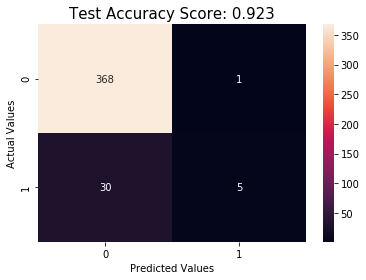

In [27]:
from sklearn.metrics import confusion_matrix as cm
predictions = loj_model.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Test Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [28]:
accuracy_score(y_test, y_pred)



0.9232673267326733

In [29]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.83      0.14      0.24        35

    accuracy                           0.92       404
   macro avg       0.88      0.57      0.60       404
weighted avg       0.92      0.92      0.90       404



In [30]:
loj_model.predict_proba(X_test)[0:10][:,0:2]


array([[0.9368772 , 0.0631228 ],
       [0.90337934, 0.09662066],
       [0.96846372, 0.03153628],
       [0.97674545, 0.02325455],
       [0.9058224 , 0.0941776 ],
       [0.95139755, 0.04860245],
       [0.89210843, 0.10789157],
       [0.91923899, 0.08076101],
       [0.98292371, 0.01707629],
       [0.96129049, 0.03870951]])

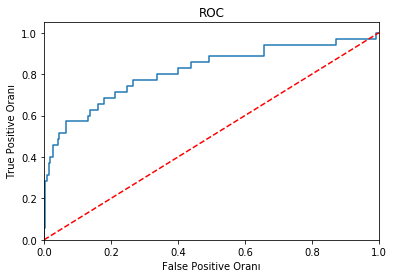

In [31]:
# ROC 
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))# burdaki score öenmli

fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [32]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))
logit_roc_auc 


0.5700735578784358

In [33]:
cross_val_score(loj_model, X_test, y_test, cv = 10)


array([0.92682927, 0.95121951, 1.        , 0.90243902, 0.9       ,
       0.925     , 0.95      , 0.95      , 0.925     , 0.9       ])

In [34]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.933048780487805

# Gaussian Naive Bayes

In [35]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model


GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
nb_model.predict(X_test)[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
nb_model.predict_proba(X_test)[0:10]


array([[0.98931811, 0.01068189],
       [0.99513943, 0.00486057],
       [0.99746934, 0.00253066],
       [0.99625835, 0.00374165],
       [0.99632327, 0.00367673],
       [0.98945055, 0.01054945],
       [0.99375044, 0.00624956],
       [0.99639335, 0.00360665],
       [0.99571864, 0.00428136],
       [0.99831886, 0.00168114]])

In [40]:
y_pred = nb_model.predict(X_test)


In [41]:
accuracy_score(y_test, y_pred)


0.9158415841584159

In [42]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()


0.9158536585365853

# KNN -k-nearest neighbors

## KNN - Model & Tahmin

In [43]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [44]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
y_pred = knn_model.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.905940594059406

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       369
           1       0.20      0.03      0.05        35

    accuracy                           0.91       404
   macro avg       0.56      0.51      0.50       404
weighted avg       0.85      0.91      0.87       404



## KNN - Model Tuning

In [48]:
knn_model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
knn_params = {"n_neighbors": np.arange(1,50)}


In [50]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))


En iyi skor:0.911406333870102
En iyi parametreler: {'n_neighbors': 12}


In [52]:
knn = KNeighborsClassifier(12)
knn_tuned = knn.fit(X_train, y_train)


In [53]:
knn_tuned.score(X_test, y_test)


0.9133663366336634

In [54]:
y_pred = knn_tuned.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)


0.9133663366336634

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



# Neural Network

   

In [57]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [58]:
from sklearn.preprocessing import StandardScaler  

In [59]:
scaler = StandardScaler()

In [60]:
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [61]:
from sklearn.neural_network import MLPClassifier

In [62]:
mlpc = MLPClassifier().fit(X_train, y_train)


In [63]:
y_pred = mlpc.predict(X_test)
accuracy_score(y_test, y_pred)

0.943069306930693

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.93      0.37      0.53        35

    accuracy                           0.94       404
   macro avg       0.94      0.68      0.75       404
weighted avg       0.94      0.94      0.93       404



##  Neural Network- Model Tuning

In [65]:
mlpc


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [90]:
?mlpc

In [91]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [93]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 23.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [94]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [66]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.005, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")


In [67]:
mlpc_tuned.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [68]:
y_pred = mlpc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9455445544554455

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       369
           1       0.78      0.51      0.62        35

    accuracy                           0.95       404
   macro avg       0.87      0.75      0.80       404
weighted avg       0.94      0.95      0.94       404



# CART 

   

## CART - Model & Tahmin

In [70]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [74]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))



((((1 if x[4] <= 2.5 else (0 if x[5] <= 33.89999961853027 else 1) if x[0] <=
    3250.0 else ((1 if x[5] <= 20.739999771118164 else (((((((((0 if x[3] <=
    98.23500061035156 else 1) if x[0] <= 5000.0 else 0 if x[0] <= 7850.0 else
    1 if x[0] <= 8050.0 else 0) if x[10] <= 0.5 else 1) if x[3] <= 
    125.86000061035156 else 1 if x[7] <= 0.5 else 0) if x[0] <= 8750.0 else
    1 if x[5] <= 27.016000747680664 else 0 if x[4] <= 11.5 else 1 if x[3] <=
    107.08000183105469 else 0) if x[4] <= 21.5 else 1 if x[0] <= 5250.0 else
    (0 if x[3] <= 93.68000030517578 else 1) if x[3] <= 97.7249984741211 else
    0) if x[3] <= 172.19000244140625 else 1) if x[5] <= 38.168500900268555 else
    1) if x[5] <= 38.482500076293945 else 1 if x[0] <= 4100.0 else 0) if x[
    2] <= 1.5 else (0 if x[3] <= 141.64500427246094 else 1 if x[4] <= 24.5 else
    0) if x[5] <= 36.14699935913086 else 1) if x[3] <= 172.70000457763672 else
    ((1 if x[3] <= 255.99999237060547 else 0) if x[4] <= 8.5 else 0) if x[3
  

In [75]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9306930693069307

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       369
           1       0.60      0.60      0.60        35

    accuracy                           0.93       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.93      0.93      0.93       404



## CART - Model Tuning

In [77]:
cart_model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
?cart_model


In [109]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [110]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1772 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   18.0s finished


In [111]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))


En iyi parametreler: {'max_depth': 4, 'min_samples_split': 2}


In [78]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)


In [79]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.92      0.34      0.50        35

    accuracy                           0.94       404
   macro avg       0.93      0.67      0.73       404
weighted avg       0.94      0.94      0.93       404



# Random Forests

In [81]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [83]:
from sklearn.ensemble import RandomForestClassifier


In [84]:
rf_model = RandomForestClassifier().fit(X_train, y_train)


In [85]:
rf_model


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.943069306930693

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.93      0.37      0.53        35

    accuracy                           0.94       404
   macro avg       0.94      0.68      0.75       404
weighted avg       0.94      0.94      0.93       404



## Random Forests -Model Tuning

In [88]:
rf_model


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
?rf_model


In [123]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000], # ağaç sayısı
            "min_samples_split": [2,5,10]} #


In [124]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [125]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 11.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [126]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))
 

En iyi parametreler: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 1000}


In [89]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 2, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       1.00      0.31      0.48        35

    accuracy                           0.94       404
   macro avg       0.97      0.66      0.72       404
weighted avg       0.94      0.94      0.93       404



In [92]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

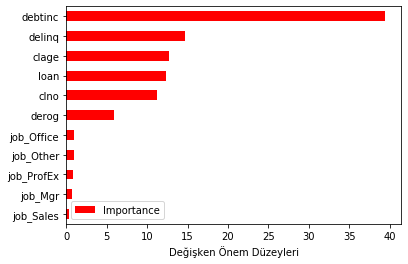

In [93]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines(GBM)

In [94]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [96]:
from sklearn.ensemble import GradientBoostingClassifier


In [97]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)


In [98]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.943069306930693

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.88      0.40      0.55        35

    accuracy                           0.94       404
   macro avg       0.91      0.70      0.76       404
weighted avg       0.94      0.94      0.93       404



## GBM - Model Tuning

In [100]:
gbm_model


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [138]:
?gbm_model

In [139]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100], # ağaç sayısı
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}


In [140]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
# cross-val işlemimizi yaptık

In [141]:
gbm_cv.fit(X_train, y_train)
# sayıları train seti içinde döndüler

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [142]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))


En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [101]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 5,
                                min_samples_split = 10,
                                n_estimators = 500)


In [102]:
gbm_tuned =  gbm.fit(X_train,y_train)


In [103]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9504950495049505

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.89      0.49      0.63        35

    accuracy                           0.95       404
   macro avg       0.92      0.74      0.80       404
weighted avg       0.95      0.95      0.94       404



# XGBoost (eXtreme Gradient Boosting)


In [105]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [106]:
from xgboost import XGBClassifier

In [107]:
xgb_model = XGBClassifier().fit(X_train, y_train)


In [108]:
xgb_model


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.82      0.40      0.54        35

    accuracy                           0.94       404
   macro avg       0.88      0.70      0.75       404
weighted avg       0.94      0.94      0.93       404



## XGBoost -Model Tuning

In [111]:
xgb_model


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
?xgb_model

In [154]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}


In [155]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)


In [156]:
xgb_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 55.2min finished


[22:57:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [157]:
xgb_cv_model.best_params_
# burda optimal parametreleri gördük

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [112]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 500,
                    subsample = 0.6)


In [113]:
xgb_tuned =  xgb.fit(X_train,y_train)


[18:14:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [114]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9331683168316832

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       369
           1       0.79      0.31      0.45        35

    accuracy                           0.93       404
   macro avg       0.86      0.65      0.71       404
weighted avg       0.93      0.93      0.92       404



# LightGBM    

In [116]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [117]:
from lightgbm import LGBMClassifier


In [118]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)


In [119]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       369
           1       0.87      0.37      0.52        35

    accuracy                           0.94       404
   macro avg       0.91      0.68      0.74       404
weighted avg       0.94      0.94      0.93       404



## LightGBM -Model Tuning

In [121]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [167]:
?lgbm_model

In [168]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}
# burda optimize edilmesini istediğimiz model parametrelerini ve dönmesini istediğimiz aralıklar

In [169]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

# burda 10 katlı cross_val işlemi yaptık
# hala verbose= 2 ne işe yarıyor öğrenemedik.

In [170]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 20.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [171]:
lgbm_cv_model.best_params_


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 5,
 'n_estimators': 100,
 'subsample': 0.6}

In [122]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 5)


In [123]:
lgbm_tuned = lgbm.fit(X_train,y_train)


In [124]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9356435643564357

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       369
           1       0.80      0.34      0.48        35

    accuracy                           0.94       404
   macro avg       0.87      0.67      0.72       404
weighted avg       0.93      0.94      0.92       404



# CatBoost (Category Boosting)

In [175]:
y=df["bad"]
X_=df.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X=X.drop(["mortdue","reason_DebtCon","yoj","value","ninq"],axis=1)
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X.head()

,loan,derog,delinq,clage,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200,0.0,0.0,168.96,26.0,36.056,1,0,0,0,0
154,21700,0.0,0.0,64.51,24.0,38.079,1,0,0,0,0
155,34100,0.0,2.0,196.01,50.0,42.459,1,0,0,0,0
156,8400,0.0,2.0,131.47,22.0,29.200,1,0,0,0,0
157,17400,1.0,0.0,95.36,17.0,27.108,1,0,0,0,0


In [126]:
#!pip install catboost
from catboost import CatBoostClassifier


In [128]:
cat_model = CatBoostClassifier().fit(X_train, y_train)


Learning rate set to 0.012639
0:	learn: 0.6770390	total: 64.4ms	remaining: 1m 4s
1:	learn: 0.6620332	total: 68.1ms	remaining: 34s
2:	learn: 0.6486283	total: 73.4ms	remaining: 24.4s
3:	learn: 0.6353573	total: 76.7ms	remaining: 19.1s
4:	learn: 0.6224700	total: 86.1ms	remaining: 17.1s
5:	learn: 0.6093922	total: 91.5ms	remaining: 15.2s
6:	learn: 0.5960442	total: 94.8ms	remaining: 13.4s
7:	learn: 0.5862344	total: 98.3ms	remaining: 12.2s
8:	learn: 0.5751007	total: 102ms	remaining: 11.2s
9:	learn: 0.5640252	total: 105ms	remaining: 10.4s
10:	learn: 0.5532308	total: 107ms	remaining: 9.6s
11:	learn: 0.5433383	total: 109ms	remaining: 8.97s
12:	learn: 0.5322255	total: 112ms	remaining: 8.47s
13:	learn: 0.5224868	total: 114ms	remaining: 8.03s
14:	learn: 0.5114299	total: 116ms	remaining: 7.64s
15:	learn: 0.5025611	total: 118ms	remaining: 7.26s
16:	learn: 0.4933795	total: 120ms	remaining: 6.96s
17:	learn: 0.4839450	total: 123ms	remaining: 6.7s
18:	learn: 0.4753623	total: 125ms	remaining: 6.46s
19:	lea

174:	learn: 0.1880424	total: 555ms	remaining: 2.62s
175:	learn: 0.1876921	total: 559ms	remaining: 2.62s
176:	learn: 0.1871522	total: 562ms	remaining: 2.61s
177:	learn: 0.1868097	total: 565ms	remaining: 2.61s
178:	learn: 0.1865174	total: 568ms	remaining: 2.6s
179:	learn: 0.1863096	total: 571ms	remaining: 2.6s
180:	learn: 0.1859882	total: 574ms	remaining: 2.6s
181:	learn: 0.1857719	total: 579ms	remaining: 2.6s
182:	learn: 0.1855148	total: 582ms	remaining: 2.6s
183:	learn: 0.1852014	total: 585ms	remaining: 2.6s
184:	learn: 0.1849140	total: 588ms	remaining: 2.59s
185:	learn: 0.1847287	total: 590ms	remaining: 2.58s
186:	learn: 0.1846224	total: 592ms	remaining: 2.57s
187:	learn: 0.1842740	total: 595ms	remaining: 2.57s
188:	learn: 0.1838081	total: 597ms	remaining: 2.56s
189:	learn: 0.1835434	total: 600ms	remaining: 2.56s
190:	learn: 0.1832063	total: 603ms	remaining: 2.55s
191:	learn: 0.1830134	total: 605ms	remaining: 2.55s
192:	learn: 0.1825713	total: 607ms	remaining: 2.54s
193:	learn: 0.1820

374:	learn: 0.1466898	total: 1.29s	remaining: 2.15s
375:	learn: 0.1464931	total: 1.3s	remaining: 2.15s
376:	learn: 0.1464057	total: 1.3s	remaining: 2.15s
377:	learn: 0.1463277	total: 1.3s	remaining: 2.14s
378:	learn: 0.1461230	total: 1.31s	remaining: 2.14s
379:	learn: 0.1459304	total: 1.31s	remaining: 2.14s
380:	learn: 0.1458126	total: 1.31s	remaining: 2.13s
381:	learn: 0.1456953	total: 1.31s	remaining: 2.13s
382:	learn: 0.1455064	total: 1.32s	remaining: 2.12s
383:	learn: 0.1453482	total: 1.32s	remaining: 2.12s
384:	learn: 0.1452805	total: 1.32s	remaining: 2.12s
385:	learn: 0.1451620	total: 1.33s	remaining: 2.11s
386:	learn: 0.1449645	total: 1.33s	remaining: 2.11s
387:	learn: 0.1447283	total: 1.33s	remaining: 2.1s
388:	learn: 0.1446167	total: 1.33s	remaining: 2.1s
389:	learn: 0.1445319	total: 1.34s	remaining: 2.09s
390:	learn: 0.1443302	total: 1.34s	remaining: 2.09s
391:	learn: 0.1442939	total: 1.34s	remaining: 2.08s
392:	learn: 0.1441588	total: 1.34s	remaining: 2.08s
393:	learn: 0.144

577:	learn: 0.1206237	total: 1.83s	remaining: 1.34s
578:	learn: 0.1204110	total: 1.84s	remaining: 1.34s
579:	learn: 0.1203483	total: 1.84s	remaining: 1.33s
580:	learn: 0.1202682	total: 1.85s	remaining: 1.33s
581:	learn: 0.1202033	total: 1.85s	remaining: 1.33s
582:	learn: 0.1201585	total: 1.85s	remaining: 1.32s
583:	learn: 0.1200179	total: 1.85s	remaining: 1.32s
584:	learn: 0.1199541	total: 1.86s	remaining: 1.32s
585:	learn: 0.1199370	total: 1.86s	remaining: 1.31s
586:	learn: 0.1198074	total: 1.86s	remaining: 1.31s
587:	learn: 0.1196501	total: 1.87s	remaining: 1.31s
588:	learn: 0.1195328	total: 1.87s	remaining: 1.3s
589:	learn: 0.1194456	total: 1.87s	remaining: 1.3s
590:	learn: 0.1193936	total: 1.88s	remaining: 1.3s
591:	learn: 0.1192751	total: 1.88s	remaining: 1.29s
592:	learn: 0.1191850	total: 1.88s	remaining: 1.29s
593:	learn: 0.1188979	total: 1.88s	remaining: 1.29s
594:	learn: 0.1188638	total: 1.89s	remaining: 1.28s
595:	learn: 0.1187855	total: 1.89s	remaining: 1.28s
596:	learn: 0.1

791:	learn: 0.0996754	total: 2.38s	remaining: 625ms
792:	learn: 0.0995215	total: 2.38s	remaining: 622ms
793:	learn: 0.0992738	total: 2.39s	remaining: 619ms
794:	learn: 0.0991389	total: 2.39s	remaining: 616ms
795:	learn: 0.0990884	total: 2.39s	remaining: 613ms
796:	learn: 0.0990208	total: 2.4s	remaining: 610ms
797:	learn: 0.0989690	total: 2.4s	remaining: 607ms
798:	learn: 0.0988046	total: 2.4s	remaining: 605ms
799:	learn: 0.0986571	total: 2.41s	remaining: 602ms
800:	learn: 0.0985825	total: 2.41s	remaining: 599ms
801:	learn: 0.0984552	total: 2.41s	remaining: 596ms
802:	learn: 0.0983200	total: 2.42s	remaining: 593ms
803:	learn: 0.0982109	total: 2.42s	remaining: 590ms
804:	learn: 0.0981391	total: 2.42s	remaining: 586ms
805:	learn: 0.0980349	total: 2.42s	remaining: 583ms
806:	learn: 0.0978459	total: 2.43s	remaining: 580ms
807:	learn: 0.0978064	total: 2.43s	remaining: 577ms
808:	learn: 0.0977370	total: 2.43s	remaining: 574ms
809:	learn: 0.0976112	total: 2.43s	remaining: 571ms
810:	learn: 0.0

In [129]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9455445544554455

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.93      0.40      0.56        35

    accuracy                           0.95       404
   macro avg       0.94      0.70      0.77       404
weighted avg       0.94      0.95      0.94       404



## CatBoost - Model Tuning

In [179]:
?cat_model

In [180]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [181]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_
# süreden tasarruf için 5 katlı cros-val yaptık

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.1min finished


0:	learn: 0.6430771	total: 1.57ms	remaining: 313ms
1:	learn: 0.5999331	total: 3.23ms	remaining: 320ms
2:	learn: 0.5602754	total: 4.71ms	remaining: 309ms
3:	learn: 0.5202965	total: 6.22ms	remaining: 305ms
4:	learn: 0.4841062	total: 7.71ms	remaining: 301ms
5:	learn: 0.4549359	total: 9.33ms	remaining: 302ms
6:	learn: 0.4284667	total: 10.8ms	remaining: 298ms
7:	learn: 0.4068946	total: 12.3ms	remaining: 295ms
8:	learn: 0.3858661	total: 13.8ms	remaining: 293ms
9:	learn: 0.3684492	total: 15.3ms	remaining: 291ms
10:	learn: 0.3516451	total: 16.8ms	remaining: 289ms
11:	learn: 0.3391897	total: 18.3ms	remaining: 287ms
12:	learn: 0.3260796	total: 19.8ms	remaining: 285ms
13:	learn: 0.3146368	total: 21.3ms	remaining: 283ms
14:	learn: 0.3034741	total: 23.1ms	remaining: 285ms
15:	learn: 0.2945966	total: 25.1ms	remaining: 288ms
16:	learn: 0.2866798	total: 27ms	remaining: 290ms
17:	learn: 0.2798869	total: 28.5ms	remaining: 288ms
18:	learn: 0.2738274	total: 30ms	remaining: 285ms
19:	learn: 0.2677436	total

192:	learn: 0.1605369	total: 365ms	remaining: 13.3ms
193:	learn: 0.1603137	total: 367ms	remaining: 11.4ms
194:	learn: 0.1597509	total: 371ms	remaining: 9.51ms
195:	learn: 0.1593916	total: 373ms	remaining: 7.61ms
196:	learn: 0.1592647	total: 375ms	remaining: 5.71ms
197:	learn: 0.1592430	total: 377ms	remaining: 3.81ms
198:	learn: 0.1589648	total: 379ms	remaining: 1.9ms
199:	learn: 0.1586484	total: 381ms	remaining: 0us


{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

In [183]:
catb_cv_model.best_params_


{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

In [131]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 3)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6430771	total: 24.8ms	remaining: 4.93s
1:	learn: 0.5999331	total: 28.9ms	remaining: 2.86s
2:	learn: 0.5602754	total: 30.9ms	remaining: 2.03s
3:	learn: 0.5202965	total: 32.8ms	remaining: 1.6s
4:	learn: 0.4841062	total: 36.9ms	remaining: 1.44s
5:	learn: 0.4549359	total: 38.9ms	remaining: 1.26s
6:	learn: 0.4284667	total: 41.3ms	remaining: 1.14s
7:	learn: 0.4068946	total: 43.9ms	remaining: 1.05s
8:	learn: 0.3858661	total: 45.9ms	remaining: 974ms
9:	learn: 0.3684492	total: 50.8ms	remaining: 965ms
10:	learn: 0.3516451	total: 52.8ms	remaining: 907ms
11:	learn: 0.3391897	total: 55.2ms	remaining: 865ms
12:	learn: 0.3260796	total: 58.1ms	remaining: 836ms
13:	learn: 0.3146368	total: 62.2ms	remaining: 827ms
14:	learn: 0.3034741	total: 64.4ms	remaining: 794ms
15:	learn: 0.2945966	total: 66.3ms	remaining: 762ms
16:	learn: 0.2866798	total: 70.2ms	remaining: 755ms
17:	learn: 0.2798869	total: 72.2ms	remaining: 730ms
18:	learn: 0.2738274	total: 75.4ms	remaining: 719ms
19:	learn: 0.2677436	to

In [132]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.9405940594059405

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.92      0.34      0.50        35

    accuracy                           0.94       404
   macro avg       0.93      0.67      0.73       404
weighted avg       0.94      0.94      0.93       404



# Tüm Modellerin Karşılaştırılması

In [135]:
modeller = [
    knn_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned,
    
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))


----------------------------
KNeighborsClassifier:
Accuracy: 91.3366%
----------------------------
GaussianNB:
Accuracy: 91.5842%
----------------------------
MLPClassifier:
Accuracy: 91.3366%
----------------------------
DecisionTreeClassifier:
Accuracy: 94.0594%
----------------------------
RandomForestClassifier:
Accuracy: 94.0594%
----------------------------
GradientBoostingClassifier:
Accuracy: 95.0495%
----------------------------
CatBoostClassifier:
Accuracy: 94.0594%
----------------------------
LGBMClassifier:
Accuracy: 93.5644%
----------------------------
XGBClassifier:
Accuracy: 93.3168%


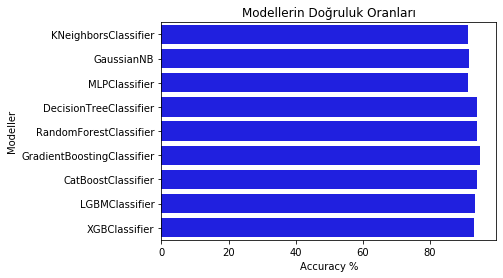

In [136]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    